<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Lecture 1.2 - Classification with Logistic Regression -  Decision Tree - Evaluation Lab

---
## 1. Load affairs dataset
---
In this lab you will be using the data from the paper [A Theory of Extramarital Affairs] [1]. Here is the [link] [2] to the data dictionary
[1]: https://fairmodel.econ.yale.edu/rayfair/pdf/1978A200.PDF "A Theory of Extramarital Affairs"

[2]: https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Fair.html "link"

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:

affair = pd.read_csv('C:/Users/mjors_000/Desktop/ECON628-01-berenger92/datasets/affairs/affair.csv')
affair.head(2)

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,1,male,37.0,10.0,no,3,18,7,4,0
1,2,female,27.0,4.0,no,4,14,6,4,0


In [3]:
affair.sex.unique()

array(['male', 'female'], dtype=object)

---
## 2. Encode nbaffairs as binary to create a 'had_affair' colum
---

We just want to see if people have had any affair or not.

In [4]:
def binary_affair(x):
    if x == 0:
        return 0
    else:
        return 1
    
affair['had_affair'] = affair.nbaffairs.map(binary_affair)

In [5]:
affair.head()

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,had_affair
0,1,male,37.0,10.00,no,3,18,7,4,0,0
1,2,female,27.0,4.00,no,4,14,6,4,0,0
2,3,female,32.0,15.00,yes,1,12,1,4,0,0
3,4,male,57.0,15.00,yes,5,18,6,5,0,0
4,5,male,22.0,0.75,no,2,17,6,3,0,0


In [6]:
affair.nbaffairs.value_counts()

0     451
7      42
12     38
1      34
3      19
2      17
Name: nbaffairs, dtype: int64

In [7]:
affair.had_affair.value_counts()

0    451
1    150
Name: had_affair, dtype: int64

---
## 3. Create a dummy variables using pd.get_dummies
---
- affair_dumm = pd.get_dummies(affair)

http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.get_dummies.html

In [8]:
affair_dumm = pd.get_dummies(affair)
affair_dumm.head(3)

,Unnamed: 0,age,ym,religious,education,occupation,rate,nbaffairs,had_affair,sex_female,sex_male,child_no,child_yes
0,1,37.0,10.0,3,18,7,4,0,0,0,1,1,0
1,2,27.0,4.0,4,14,6,4,0,0,1,0,1,0
2,3,32.0,15.0,1,12,1,4,0,0,1,0,0,1


---
## 4. Setup X and Y matrices 
---

In [10]:
columns_ = affair_dumm.columns.tolist()
exclude_cols = ['Unnamed: 0', 'had_affair', 'nbaffairs']

y = affair_dumm.had_affair.values

X = affair_dumm[[i for i in columns_ if i not in exclude_cols]]
print y.shape, X.shape

(601L,) (601, 10)


---
## 5. Define your train and test data
---

In [11]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(420, 10) (420L,)
(181, 10) (181L,)


C:\Users\mjors_000\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


---
## 6. Create and gridsearch a logistic regression, fit the regression, find best parameters, and baseline
---

In [17]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

Cs = np.logspace(0.0, 5.0, 20)

search_parameters = {  "penalty": ['l1','l2'], "C": Cs, "fit_intercept": [False, True], 
                       "class_weight": [None, "balanced"], "intercept_scaling": [2, 1], "solver":  ['liblinear']
                    }


from sklearn.grid_search import GridSearchCV

gsdt = GridSearchCV(logistic, search_parameters, cv=10, verbose=1, n_jobs=-1)

In [18]:
gsdt.fit(X_train,y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 1964 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 3193 out of 3200 | elapsed:   25.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:   25.4s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  1.00000e+00,   1.83298e+00,   3.35982e+00,   6.15848e+00,
         1.12884e+01,   2.06914e+01,   3.79269e+01,   6.95193e+01,
         1.27427e+02,   2.33572e+02,   4.28133e+02,   7.84760e+02,
         1.43845e+03,   2.63665e+03,   4.83293e+03,   8.85867e+03,
         1.62378e+04,   2.97635e+04,   5.45559e+04,   1.00000e+05]), 'intercept_scaling': [2, 1], 'solver': ['liblinear'], 'fit_intercept': [False, True], 'penalty': ['l1', 'l2'], 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [19]:
dtc_best =gsdt.best_estimator_
print "Best estimators on the left out data:\n", log_best

# print "\nBest C / Regularization Param on the left out data:\n", estimator.best_estimator_.C 
# This estimator.best_estimator_ object has many great reporting metrics
## Estimator that was chosen by the search, i.e. 
## estimator which gave highest score (or smallest loss if specified) on the left out data. 
## Not available if refit=False.

print "\nBest Params on hold out data (train):\n", gsdt.best_params_
##Parameter setting that gave the best results on the hold out data.

print "\nBest Score on left out data:%.3f \n" % gsdt.best_score_
## Score of best_estimator on the left out data.

Best estimators on the left out data:
LogisticRegression(C=1.8329807108324359, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

Best Params on hold out data (train):
{'C': 1.8329807108324359, 'intercept_scaling': 1, 'fit_intercept': True, 'solver': 'liblinear', 'penalty': 'l2', 'class_weight': None}

Best Score on left out data:0.750 



In [20]:
'''Baseline'''
'''Remeber that 0 is republican 1 is democrat'''
print affair_dumm['had_affair'].value_counts(), "\n" 
print "If I randomly choose, %.0f percent of the time I will be choosing had an affair" % ((np.mean(affair_dumm['had_affair']))*100)

0    451
1    150
Name: had_affair, dtype: int64 

If I randomly choose, 25 percent of the time I will be choosing had an affair


---
## 7. Evaluate your classfier 
---


In [21]:
from sklearn.metrics import confusion_matrix
y_pred=gsdt.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confusion = pd.DataFrame(confmat, index=['True_Label_0 No_affair', 'True_Label_1 Affair'],
                         columns=['Predict_Label_0 No_affair', 'Predict_Label_1 Affair'])

confusion

,Predict_Label_0 No_affair,Predict_Label_1 Affair
True_Label_0 No_affair,137,4
True_Label_1 Affair,32,8


In [22]:
from sklearn.metrics import classification_report

cls_rep = classification_report(y_test, y_pred)
print cls_rep

             precision    recall  f1-score   support

          0       0.81      0.97      0.88       141
          1       0.67      0.20      0.31        40

avg / total       0.78      0.80      0.76       181



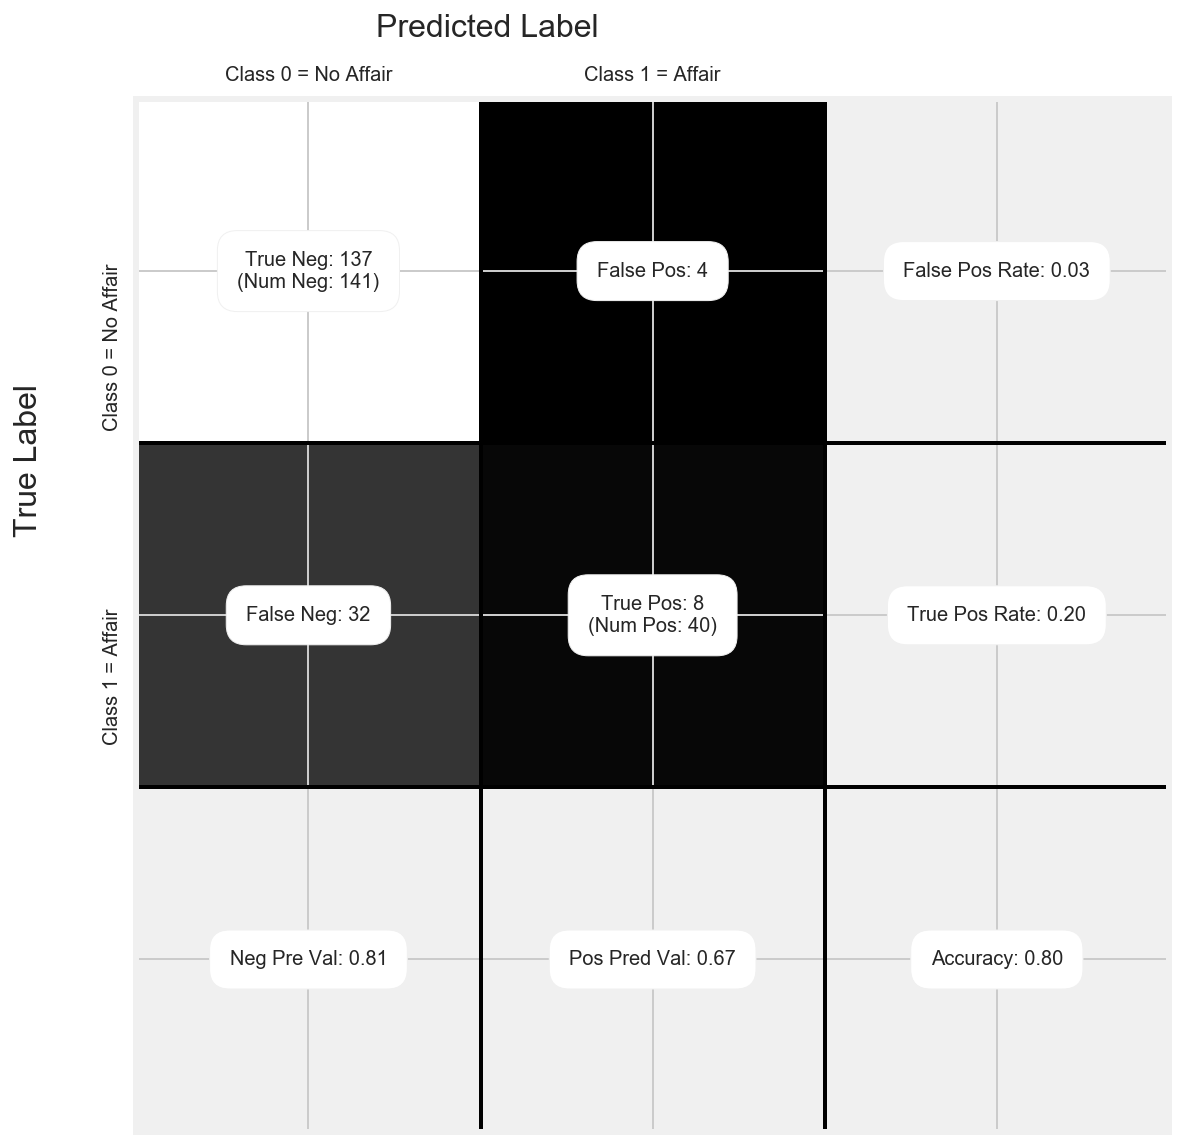

In [23]:
from confussion import show_confusion_matrix
C = confusion_matrix(y_test, gsdt.predict(X_test))
show_confusion_matrix(C, ['Class 0 = No Affair', 'Class 1 = Affair'])

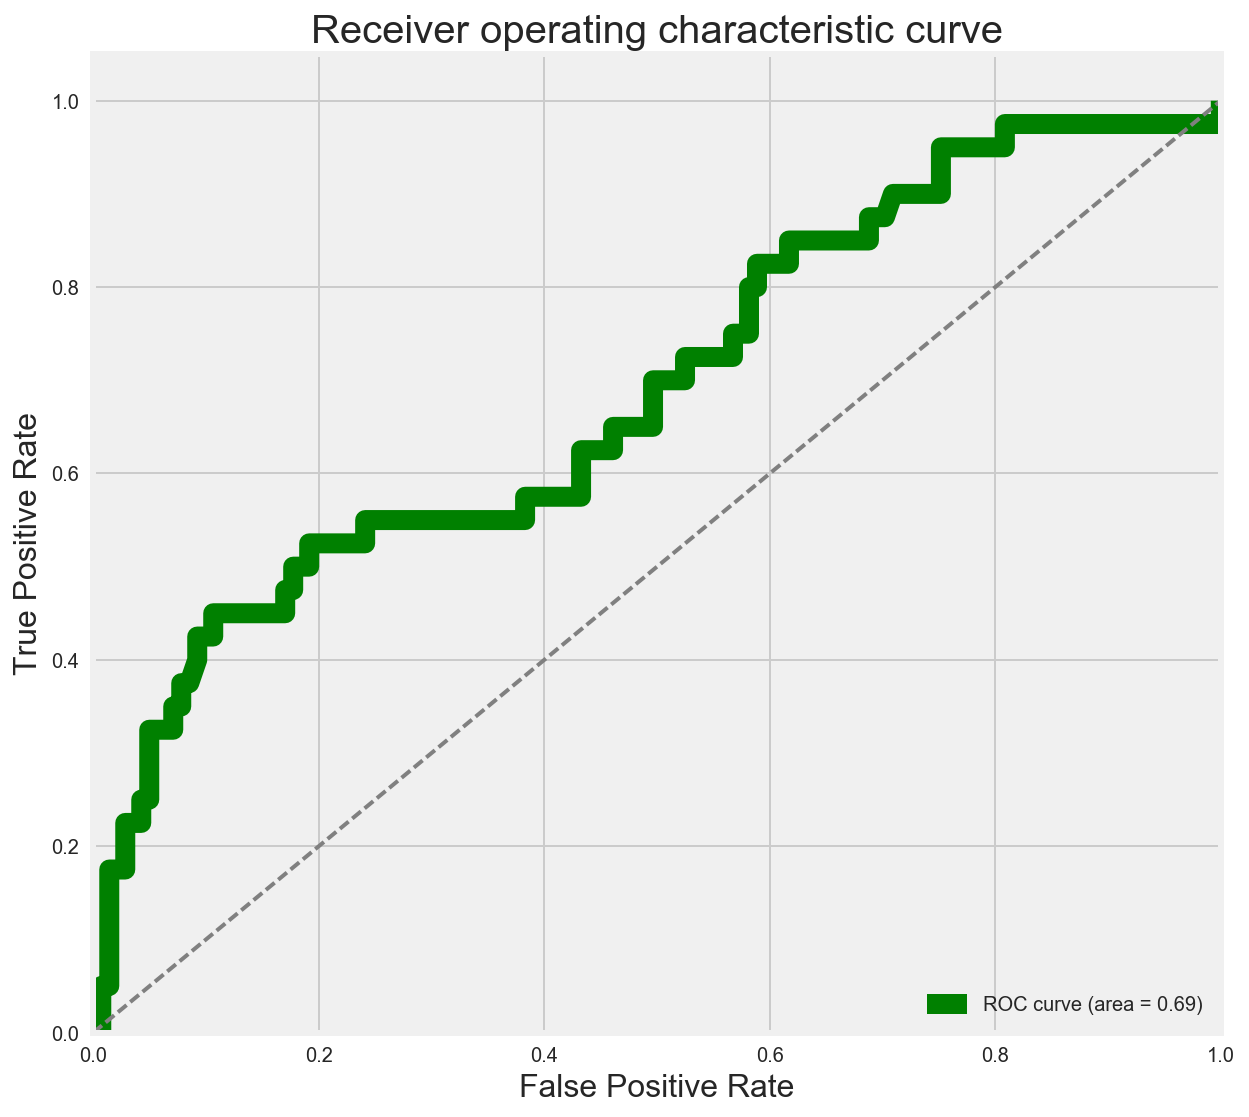

In [24]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = gsdt.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

---
## 7. Build a DT
---

In [30]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7]
         }
    
dt = GridSearchCV(dec_tree, params, n_jobs=-1, cv=5, verbose=1)

In [31]:
dt.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    5.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [32]:
dt_best = dt.best_estimator_
# print "best estimator", gsdt_best
print "\n==========\n"
print "best parameters", gsdt.best_params_
print "\n==========\n"
print "best score", gsdt.best_score_



best parameters {'max_features': 'auto', 'min_samples_split': 5, 'max_depth': 5, 'min_samples_leaf': 5}


best score 0.747619047619


---
## 8. Evaluate the DT
---

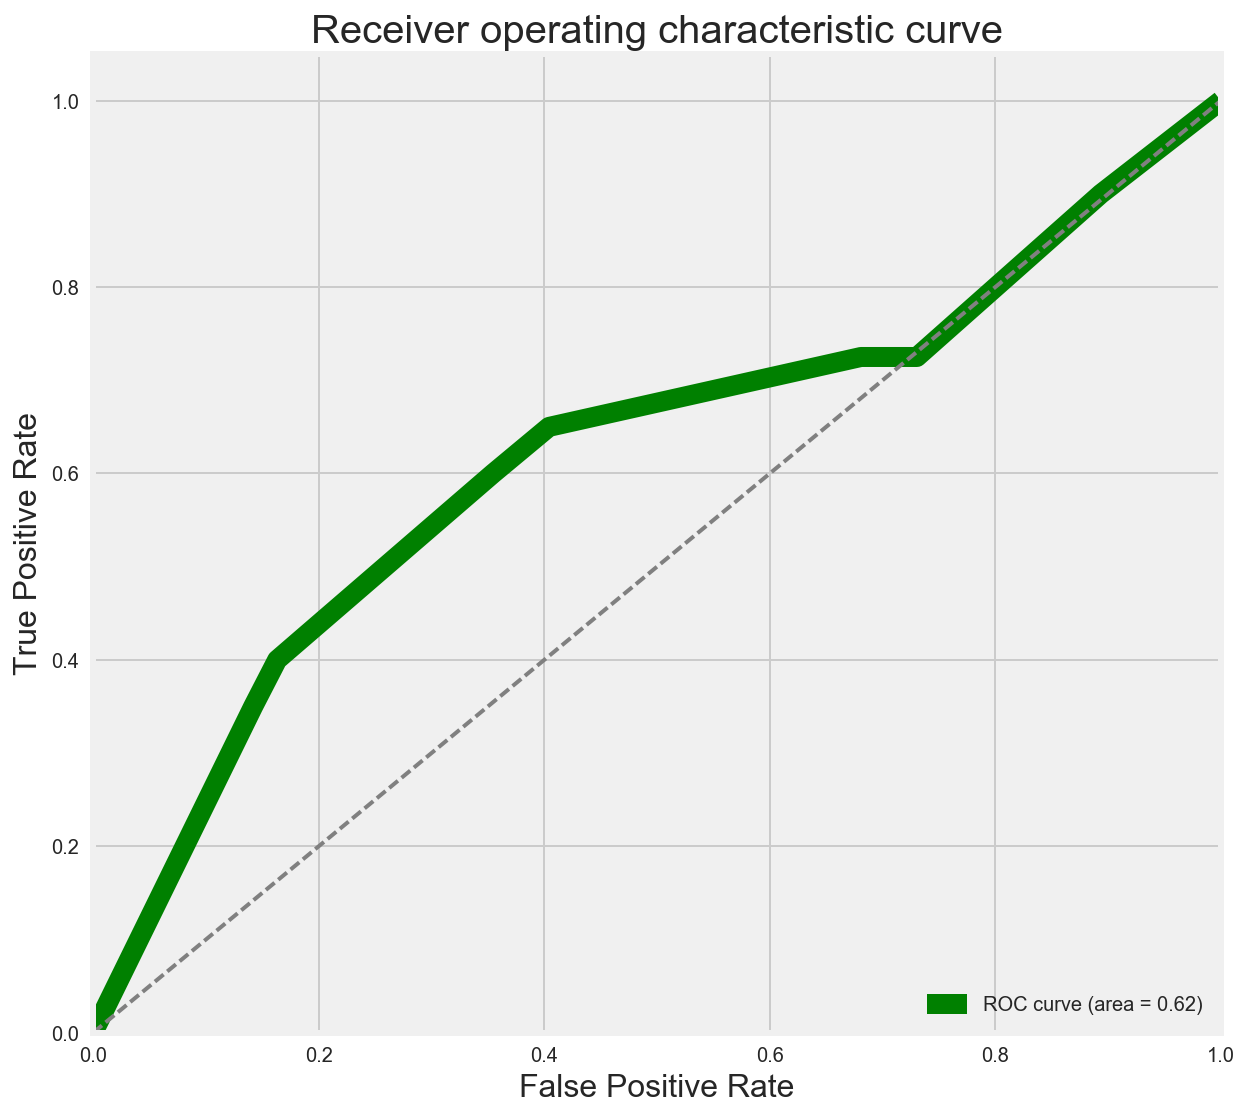

In [33]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X_test matrix
y_pp = dt.predict_proba(X_test)[:,1]

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[9,9])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=10, color='g')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

---
## 9. What Features are the best predictors
---

In [39]:
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns,'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance

In [40]:
feature_importance(X, dt_best)

,feature,importance
5,rate,0.657546
2,religious,0.232414
7,sex_male,0.072024
0,age,0.025451
9,child_yes,0.012564
1,ym,0.000000
3,education,0.000000
4,occupation,0.000000
6,sex_female,0.000000
8,child_no,0.000000


---
## 10. Visualize your tree
---

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

---
## 10. Build a RandomForestClassifier
---

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
## Define a Random Forest Classifier
rfc = RandomForestClassifier()

rf_params = {
    'max_features':[None,'log2','sqrt', 2,3,4,5],
    'max_depth':[1,2,3,None],
#     'min_samples_leaf':np.linspace(0, 101, 20),
    'n_estimators':[100]
}

## gridsearch parameters, and cv =5
rf_gs = GridSearchCV(rfc, rf_params, cv=5, verbose=1, n_jobs=-1)

---
## 11. Evaluate the RandomForestClassifier
---

---
# Warning this part might kill your computer!!

## 12. Implement a  BaggingClassifier
---

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bdt = BaggingClassifier(DecisionTreeClassifier())
params = {"base_estimator__max_depth": [3,5,10,20],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 3, 5, 7, 10],
          "base_estimator__min_samples_split": [2, 5, 7],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20],
         }
    

gsbdt = GridSearchCV(bdt, params, cv=5, verbose=1, n_jobs=-1)

---
## 11. Evaluate the BagginngClassifier
---